# Audio Features - Comparing Groups

Exploratory data analysis and statistical compaisons between the treatment (mindfulness practice) and control groups.

Goal: identify features that show largest differences between the two groups to select some prominent features for a classification model.

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data_path = './data/'

In [4]:
# Read in audio and transcript features
df_audio = pd.read_csv(data_path + 'Teacher_Mindfulness_Audio_Transcript_Features_20230214.csv')
df_audio.head()

,ID,Total_Duration,Teacher_Duration,Student_Duration,Percent_Time_Teacher,Average_Speaker_Duration,Average_Teacher_Duration,Average_Student_Duration,Total_Word_Count,Teacher_Word_Count,Student_Word_Count,Teacher_Percent_Words,Total_Word_Rate,Teacher_Word_Rate,Student_Word_Rate,Total_Speaker_Line_Count,Teacher_Line_Count,Student_Line_Count,number_ of_syllables,number_of_pauses,rate_of_speech,articulation_rate,speaking_duration,original_duration,balance,f0_mean,f0_std,f0_median,f0_min,f0_max,f0_quantile25,f0_quan75,Mood,MFCC_1_Mean,MFCC_2_Mean,MFCC_3_Mean,MFCC_4_Mean,MFCC_5_Mean,MFCC_6_Mean,MFCC_7_Mean,MFCC_8_Mean,MFCC_9_Mean,MFCC_10_Mean,MFCC_11_Mean,MFCC_12_Mean,MFCC_13_Mean,MFCC_1_Var,MFCC_2_Var,MFCC_3_Var,MFCC_4_Var,MFCC_5_Var,MFCC_6_Var,MFCC_7_Var,MFCC_8_Var,MFCC_9_Var,MFCC_10_Var,MFCC_11_Var,MFCC_12_Var,MFCC_13_Var,MFCC_1_Skew,MFCC_2_Skew,MFCC_3_Skew,MFCC_4_Skew,MFCC_5_Skew,MFCC_6_Skew,MFCC_7_Skew,MFCC_8_Skew,MFCC_9_Skew,MFCC_10_Skew,MFCC_11_Skew,MFCC_12_Skew,MFCC_13_Skew,MFCC_1_Kurtosis,MFCC_2_Kurtosis,MFCC_3_Kurtosis,MFCC_4_Kurtosis,MFCC_5_Kurtosis,MFCC_6_Kurtosis,MFCC_7_Kurtosis,MFCC_8_Kurtosis,MFCC_9_Kurtosis,MFCC_10_Kurtosis,MFCC_11_Kurtosis,MFCC_12_Kurtosis,MFCC_13_Kurtosis,RMS_Mean,RMS_Max,RMS_Min,RMS_Std,Centroid_Mean,Centroid_Max,Centroid_Min,Centroid_Std,Bandwidth_Mean,Bandwidth_Max,Bandwidth_Min,Bandwidth_Std,Flatness_Mean,Flatness_Max,Flatness_Min,Flatness_Std,Zero_Crossing_Rate_Mean,Zero_Crossing_Rate_Max,Zero_Crossing_Rate_Min,Zero_Crossing_Rate_Std,Loudness_Mean,Loudness_Max,Loudness_Min,Loudness_Std
0,332,308.563991,141,167.563991,0.456955,9.075411,8.294118,9.856705,697,305,392,0.437590,2.258851,2.163121,2.339405,34,17,17,411,62,3.0,4,93.5,144.6,0.6,211.67,53.96,204.2,73,409,181,242,Reading,12.275767,11.248416,-11.403405,8.994111,-6.947085,3.552934,-2.149697,-13.171859,-11.721801,-13.183566,0.719455,-1.359205,2.892683,59.003330,428.052921,376.570811,480.629189,271.816805,240.442430,250.107968,218.737862,230.139384,183.706385,173.748565,163.662589,96.546882,-4.427178,-0.384546,-0.256914,0.305199,-0.266844,-0.182173,-0.167009,-0.289583,-0.229382,-0.212150,0.169246,0.047610,0.078353,24.993674,-1.021163,-0.388692,-0.197681,-0.027963,0.335898,0.345799,0.218810,0.077423,0.002506,0.748178,0.050016,0.413932,0.029641,0.234953,0.0,0.030134,1786.920458,9837.121455,0.0,1342.793978,1637.887678,4029.576143,0.0,736.167078,0.019112,1.000001,1.480000e-06,0.101342,0.106655,0.724121,0.0,0.111820,-41.060013,-12.580391,-92.580391,19.036415
1,348,309.289320,86,223.289320,0.278057,6.580624,3.739130,9.303722,698,195,503,0.279370,2.256787,2.267442,2.252683,47,23,24,255,39,3.0,5,50.5,86.0,0.6,244.32,56.67,242.1,80,421,208,278,speaking passionately,10.869401,9.074677,-11.908164,7.795241,-7.867180,-0.395680,-6.808521,-14.854105,-5.608134,0.335741,2.010402,-11.104792,-2.374372,117.844373,443.504212,340.872066,421.846288,392.088738,269.676208,282.780823,278.891346,201.598711,184.257387,180.524235,156.742620,103.860091,-3.403572,-0.447509,-0.170911,0.054505,-0.355915,0.015943,-0.269408,-0.323910,-0.181812,0.243745,0.255444,-0.148239,-0.153220,12.028351,-0.977772,-0.562810,-0.102892,-0.054601,0.898272,0.406222,-0.280488,0.297556,0.332433,0.374174,-0.063299,0.823779,0.027384,0.194261,0.0,0.029680,1880.643307,9922.177642,0.0,1412.091525,1741.747397,4338.004791,0.0,810.380525,0.038517,1.000001,2.170000e-06,0.168635,0.102524,0.819824,0.0,0.115759,-43.753429,-14.232292,-94.232292,21.297735
2,335,313.918662,145,168.918662,0.461903,6.975970,6.590909,7.344290,1021,567,454,0.555338,3.252435,3.910345,2.687684,45,22,23,427,87,3.0,5,87.3,141.0,0.6,239.45,66.01,232.6,72,424,189,287,speaking passionately,11.718530,5.376386,-16.785159,14.851442,-1.599988,0.735789,-0.782310,-13.534004,-5.126506,-5.123688,-7.457674,-6.685852,-0.191224,103.212547,407.618625,404.010201,325.159615,254.870539,195.726934,270.849372,262.024990,174.123677,163.250007,181.294042,127.413792,87.696152,-3.331619,-0.295017,-0.139161,0.311863,-0.106684,-0.227299,-0.159920,-0.256241,-0.

Filter to training data and get treatment/control indicator (mindfulness column)

In [5]:
# Read in holdout samples lookup table
df_holdout_lookup = pd.read_csv('../holdout_samples_lookup.csv')

In [6]:
# Filter to non-holdout records
df_holdout_lookup = df_holdout_lookup[df_holdout_lookup['holdout']==0]

In [7]:
# Filter audio data to non-holdout records only
df = df_audio.merge(df_holdout_lookup,
                          left_on = 'ID', 
                          right_on = 'studyid')
df.drop('studyid', axis = 1, inplace = True)

In [8]:
df

,ID,Total_Duration,Teacher_Duration,Student_Duration,Percent_Time_Teacher,Average_Speaker_Duration,Average_Teacher_Duration,Average_Student_Duration,Total_Word_Count,Teacher_Word_Count,Student_Word_Count,Teacher_Percent_Words,Total_Word_Rate,Teacher_Word_Rate,Student_Word_Rate,Total_Speaker_Line_Count,Teacher_Line_Count,Student_Line_Count,number_ of_syllables,number_of_pauses,rate_of_speech,articulation_rate,speaking_duration,original_duration,balance,f0_mean,f0_std,f0_median,f0_min,f0_max,f0_quantile25,f0_quan75,Mood,MFCC_1_Mean,MFCC_2_Mean,MFCC_3_Mean,MFCC_4_Mean,MFCC_5_Mean,MFCC_6_Mean,MFCC_7_Mean,MFCC_8_Mean,MFCC_9_Mean,MFCC_10_Mean,MFCC_11_Mean,MFCC_12_Mean,MFCC_13_Mean,MFCC_1_Var,MFCC_2_Var,MFCC_3_Var,MFCC_4_Var,MFCC_5_Var,MFCC_6_Var,MFCC_7_Var,MFCC_8_Var,MFCC_9_Var,MFCC_10_Var,MFCC_11_Var,MFCC_12_Var,MFCC_13_Var,MFCC_1_Skew,MFCC_2_Skew,MFCC_3_Skew,MFCC_4_Skew,MFCC_5_Skew,MFCC_6_Skew,MFCC_7_Skew,MFCC_8_Skew,MFCC_9_Skew,MFCC_10_Skew,MFCC_11_Skew,MFCC_12_Skew,MFCC_13_Skew,MFCC_1_Kurtosis,MFCC_2_Kurtosis,MFCC_3_Kurtosis,MFCC_4_Kurtosis,MFCC_5_Kurtosis,MFCC_6_Kurtosis,MFCC_7_Kurtosis,MFCC_8_Kurtosis,MFCC_9_Kurtosis,MFCC_10_Kurtosis,MFCC_11_Kurtosis,MFCC_12_Kurtosis,MFCC_13_Kurtosis,RMS_Mean,RMS_Max,RMS_Min,RMS_Std,Centroid_Mean,Centroid_Max,Centroid_Min,Centroid_Std,Bandwidth_Mean,Bandwidth_Max,Bandwidth_Min,Bandwidth_Std,Flatness_Mean,Flatness_Max,Flatness_Min,Flatness_Std,Zero_Crossing_Rate_Mean,Zero_Crossing_Rate_Max,Zero_Crossing_Rate_Min,Zero_Crossing_Rate_Std,Loudness_Mean,Loudness_Max,Loudness_Min,Loudness_Std,mindfulness,300s,holdout
0,332,308.563991,141,167.563991,0.456955,9.075411,8.294118,9.856705,697,305,392,0.437590,2.258851,2.163121,2.339405,34,17,17,411,62,3.0,4,93.5,144.6,0.6,211.67,53.96,204.2,73,409,181,242,Reading,12.275767,11.248416,-11.403405,8.994111,-6.947085,3.552934,-2.149697,-13.171859,-11.721801,-13.183566,0.719455,-1.359205,2.892683,59.003330,428.052921,376.570811,480.629189,271.816805,240.442430,250.107968,218.737862,230.139384,183.706385,173.748565,163.662589,96.546882,-4.427178,-0.384546,-0.256914,0.305199,-0.266844,-0.182173,-0.167009,-0.289583,-0.229382,-0.212150,0.169246,0.047610,0.078353,24.993674,-1.021163,-0.388692,-0.197681,-0.027963,0.335898,0.345799,0.218810,0.077423,0.002506,0.748178,0.050016,0.413932,0.029641,0.234953,0.000000,0.030134,1786.920458,9837.121455,0.000000,1342.793978,1637.887678,4029.576143,0.000000,736.167078,0.019112,1.000001,1.480000e-06,0.101342,0.106655,0.724121,0.000000,0.111820,-41.060013,-12.580391,-92.580391,19.036415,1,1,0
1,348,309.289320,86,223.289320,0.278057,6.580624,3.739130,9.303722,698,195,503,0.279370,2.256787,2.267442,2.252683,47,23,24,255,39,3.0,5,50.5,86.0,0.6,244.32,56.67,242.1,80,421,208,278,speaking passionately,10.869401,9.074677,-11.908164,7.795241,-7.867180,-0.395680,-6.808521,-14.854105,-5.608134,0.335741,2.010402,-11.104792,-2.374372,117.844373,443.504212,340.872066,421.846288,392.088738,269.676208,282.780823,278.891346,201.598711,184.257387,180.524235,156.742620,103.860091,-3.403572,-0.447509,-0.170911,0.054505,-0.355915,0.015943,-0.269408,-0.323910,-0.181812,0.243745,0.255444,-0.148239,-0.153220,12.028351,-0.977772,-0.562810,-0.102892,-0.054601,0.898272,0.406222,-0.280488,0.297556,0.332433,0.374174,-0.063299,0.823779,0.027384,0.194261,0.000000,0.029680,1880.643307,9922.177642,0.000000,1412.091525,1741.747397,4338.004791,0.000000,810.380525,0.038517,1.000001,2.170000e-06,0.168635,0.102524,0.819824,0.000000,0.115759,-43.753429,-14.232292,-94.232292,21.297735,1,1,0
2,320,308.307982,180,128.307982,0.583832,5.817132,6.923077,4.752147,651,407,244,0.625192,2.111525,2.261111,1.901674,53,26,27,483,87,3.0,4,108.2,180.0,0.6,218.64,48.18,213.8,63,399,197,236,Reading,11.545912,9.608454,-13.597440,9.822735,-3.677619,-1.317304,-4.212004,-9.734657,-10.206085,-2.904614,9.073298,-8.873303,-4.542405,86.495649,455.106862,404.700091,399.136040,359.937328,280.941977,284.159785,237.234180,230.479150,141.055942,194.595753,136.359171,82.947987,-3.886069,-0.276518,-

## Full Treatment versus Control

Compare treatment (mindulness = 1) and control (mindfulness = 0) across all participants (200s and 300s).

### Two Sample T-Test

Compute t-test comparing the differences in means between the treatment and control groups. Loop through each variable and save the t-stat and p-value in a data frame. 

Use [Scipy t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the T-test for the means of two independent samples. This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [9]:
# Get list of all potential features in this data
feature_list = [feat for feat in df.columns if feat not in ['ID', 'studyid', 'mindfulness', 'Mood', '300s', 'holdout']]

In [10]:
# Create empty df to hold t-test results
ttest_results = pd.DataFrame()

In [11]:
for feat in feature_list:
    # Separate treatment and control into separate dataframes
    # and select just this feature
    df_0 = df[df['mindfulness']==0]
    df_1 = df[df['mindfulness']==1]
    
    # Compute t test results for this feature
    temp_result = stats.ttest_ind(a = df_0[feat], 
                                  b = df_1[feat],
                                  equal_var = False)
    
    # Add t stat and p value to results df
    df_temp = pd.DataFrame({
                            'feature': feat,
                            'mean_0': df_0[feat].mean(),
                            'mean_1': df_1[feat].mean(),
                            't_statistic': temp_result[0],
                            'p_value': temp_result[1]
                            }, 
                            index = [0])
    
    ttest_results = pd.concat([ttest_results, df_temp], axis=0)


In [12]:
ttest_results.reset_index(inplace = True, drop = True)

In [13]:
# Sort by p-value to see which variables show the largest differences
ttest_results.sort_values('p_value', inplace = True)
ttest_results.head(10)

,feature,mean_0,mean_1,t_statistic,p_value
102,Zero_Crossing_Rate_Std,0.108109,0.097637,2.118993,0.038728
13,Student_Word_Rate,2.089122,2.248340,-1.987631,0.050985
95,Flatness_Mean,0.032036,0.021637,1.953778,0.054878
98,Flatness_Std,0.128044,0.093263,1.834452,0.070899
74,MFCC_5_Kurtosis,0.173829,-0.049847,1.801957,0.077136
44,MFCC_1_Var,91.280531,66.037515,1.786926,0.078417
90,Centroid_Std,1282.166986,1181.659778,1.790963,0.078511
68,MFCC_12_Skew,-0.084063,-0.002248,-1.779579,0.079560
34,MFCC_4_Mean,6.902417,4.582295,1.771954,0.081046
91,Bandwidth_Mean,1689.559720,1616.036908,1.766707,0.081711


### EDA for Top Features

Now that we've identified some features with some differences between the treatment and control groups we can create some graphs to visualize how these distributions compare between the two groups. To start we'll visualize just the variables with the 10 smallest p-values. 

In [19]:
top_10_feats = ttest_results.head(10).feature.to_list()

Feature: Zero_Crossing_Rate_Std
P-value: 0.0387


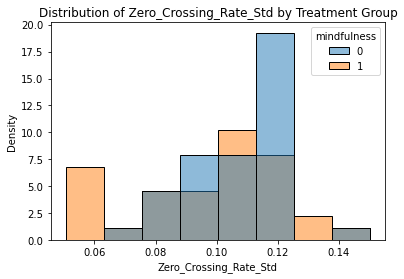

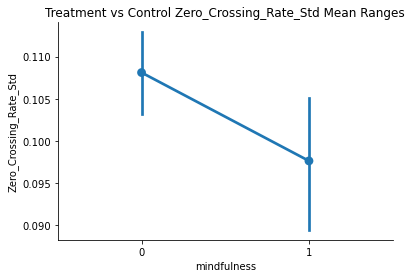


Feature: Student_Word_Rate
P-value: 0.051


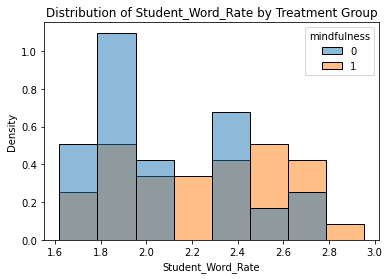

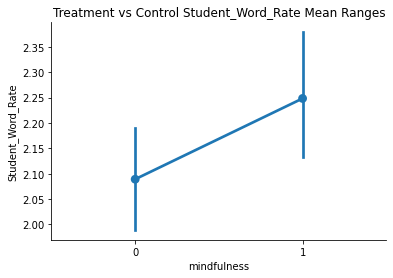


Feature: Flatness_Mean
P-value: 0.0549


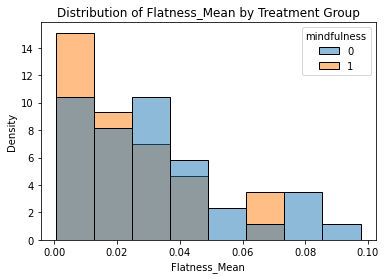

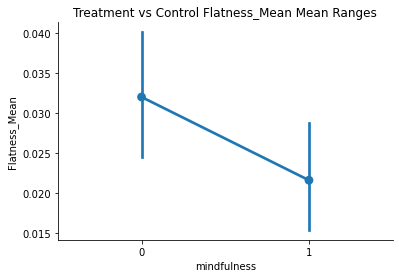


Feature: Flatness_Std
P-value: 0.0709


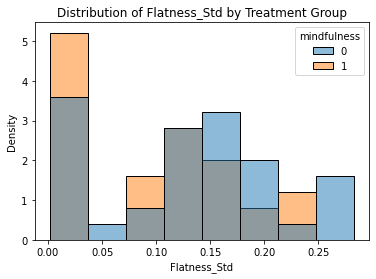

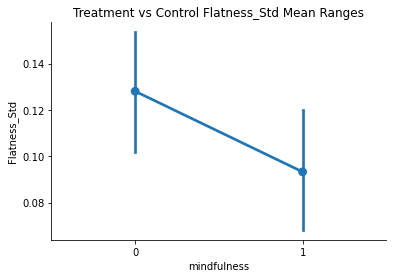


Feature: MFCC_5_Kurtosis
P-value: 0.0771


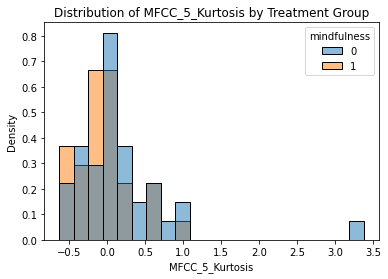

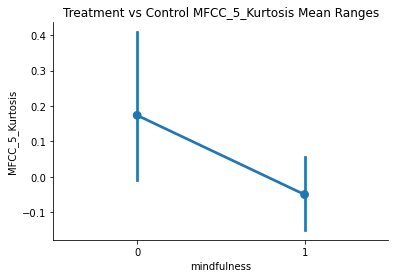


Feature: MFCC_1_Var
P-value: 0.0784


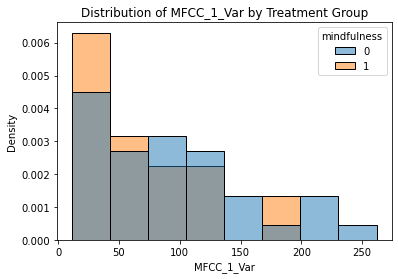

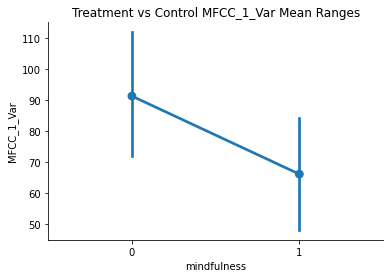


Feature: Centroid_Std
P-value: 0.0785


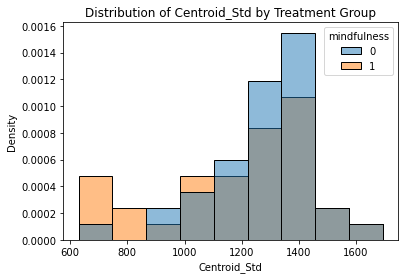

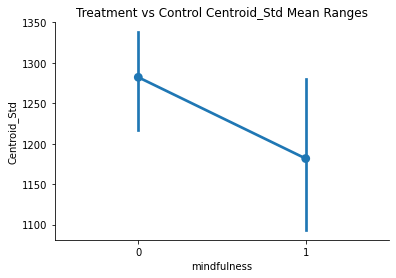


Feature: MFCC_12_Skew
P-value: 0.0796


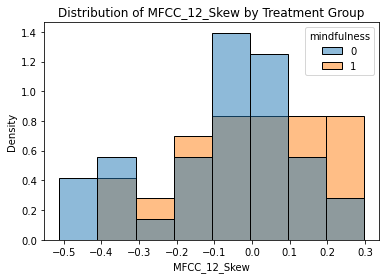

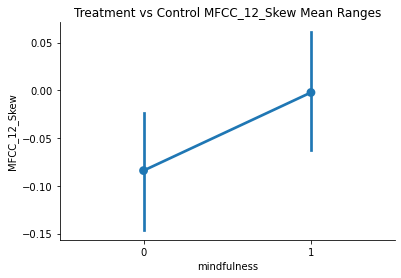


Feature: MFCC_4_Mean
P-value: 0.081


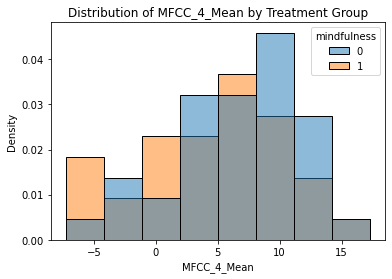

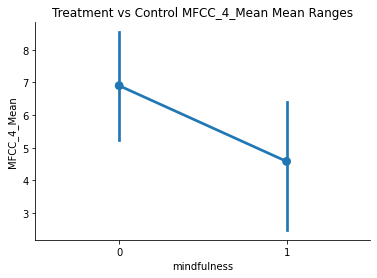


Feature: Bandwidth_Mean
P-value: 0.0817


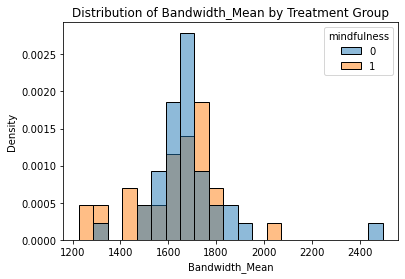

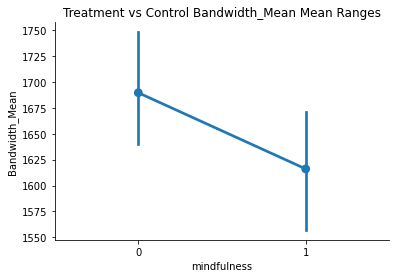

In [20]:
for feat in top_10_feats:
    print(f'Feature: {feat}')
    p_val = ttest_results[ttest_results['feature']==feat]['p_value'].iloc[0]
    print(f'P-value: {round(p_val,4)}')
    
    # Histogram comparing distrubtion of feature by group
    sns.histplot(data = df, 
                 x = feat, 
                 hue = 'mindfulness',
                 stat = 'density')
    plt.title(f'Distribution of {feat} by Treatment Group')
    plt.show()
    
    # Plot comparing means and uncertainty
    sns.pointplot(x = 'mindfulness', y = feat, data = df)
    sns.despine()
    plt.title(f'Treatment vs Control {feat} Mean Ranges')
    plt.show()
    print()

Observations:
- As we can see in the visuals above, there is quite a bit of overlap in many of these feature distributions. This overlap between the treatment and control groups is consistent with the mostly statistically insignifcany p-values in our mean differences results above. 

## 300s Treatment versus Control

After reviewing the t-tests (mean difference) results from the Full Data (200s + 300s), we wondered whether covid had an impact on the results for participants in the 200s. Thus, we'd like to perform a similar analysis just using participats from the 300s to see whether we observe any difference in the signifcance of the mean differences between the treatment and control participants for this subset of the study. 


Compare treatment (mindulness = 1) and control (mindfulness = 0) across 300s participants.

In [21]:
# Filter to 300s
df_300s = df[df['ID'] >= 300]

### Two Sample T-Test

Compute t-test comparing the differences in means between the treatment and control groups. Loop through each variable and save the t-stat and p-value in a data frame. 

Use [Scipy t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the T-test for the means of two independent samples. This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [22]:
# Create empty df to hold t-test results
ttest_results_300s = pd.DataFrame()

In [23]:
for feat in feature_list:
    # Separate treatment and control into separate dataframes
    # and select just this feature
    df_0 = df_300s[df_300s['mindfulness']==0]
    df_1 = df_300s[df_300s['mindfulness']==1]
    
    # Compute t test results for this feature
    temp_result = stats.ttest_ind(a = df_0[feat], 
                                  b = df_1[feat],
                                  equal_var = False)
    
    # Add t stat and p value to results df
    df_temp = pd.DataFrame({
                            'feature': feat,
                            'mean_0': df_0[feat].mean(),
                            'mean_1': df_1[feat].mean(),
                            't_statistic': temp_result[0],
                            'p_value': temp_result[1]
                            }, 
                            index = [0])
    
    ttest_results_300s = pd.concat([ttest_results_300s, df_temp], axis=0)


In [24]:
ttest_results_300s.reset_index(inplace = True, drop = True)

In [25]:
# Sort by p-value to see which variables show the largest differences
ttest_results_300s.sort_values('p_value', inplace = True)
ttest_results_300s.head(10)

,feature,mean_0,mean_1,t_statistic,p_value
72,MFCC_3_Kurtosis,-0.274586,-0.489050,2.201104,0.034259
9,Student_Word_Count,280.178571,322.714286,-1.875921,0.070536
47,MFCC_4_Var,409.874982,452.445531,-1.688971,0.098160
55,MFCC_12_Var,148.994967,161.461563,-1.668441,0.101991
74,MFCC_5_Kurtosis,0.329933,0.095851,1.606121,0.116229
10,Teacher_Percent_Words,0.639547,0.586454,1.613917,0.117372
71,MFCC_2_Kurtosis,-0.620278,-0.816340,1.578120,0.121573
69,MFCC_13_Skew,-0.194671,-0.122391,-1.576100,0.122221
13,Student_Word_Rate,2.149518,2.302230,-1.537015,0.132095
95,Flatness_Mean,0.041023,0.033163,1.425121,0.160730


Observations: 
- A number of MFCC features are among the features with the lowest p-values for the 300s only. In particular mostly the kurtosis and variance features as opposed to the mean. 
- Also a few features that are getting at the words spoken by the student versus the teachers. It appears that in the treatment group (mindfulness = 1) the students spoke more than they did in the control group. We see this in a higher mean student word could in the treatment group as well as a lower percent of words said by the teacher for the treatment group. 

### EDA for Top Features

Now that we've identified some features with some differences between the treatment and control groups we can create some graphs to visualize how these distributions compare between the two groups. To start we'll visualize just the variables with the 10 smallest p-values. As we can see in the visuals below, there is quite a bit of overlap in many of these feature distributions. This overlap between the treatment and control groups is consistent with the mostly statistically insignifcany p-values in our mean differences results above. 

In [26]:
top_10_feats = ttest_results_300s.head(10).feature.to_list()

Feature: MFCC_3_Kurtosis
P-value: 0.0343


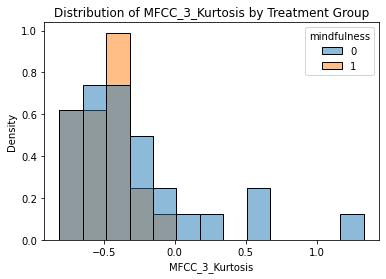

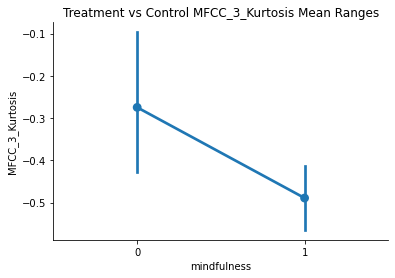


Feature: Student_Word_Count
P-value: 0.0705


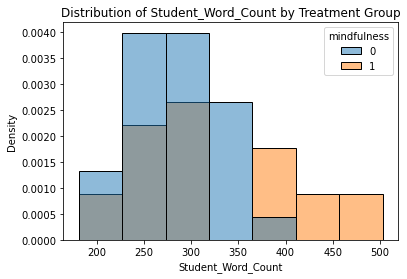

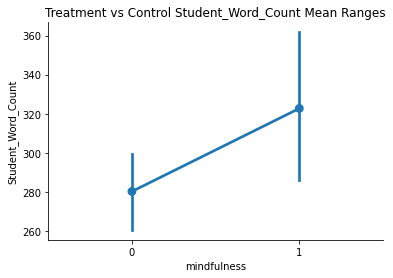


Feature: MFCC_4_Var
P-value: 0.0982


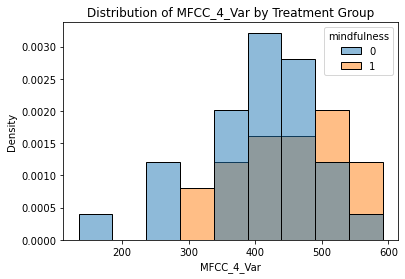

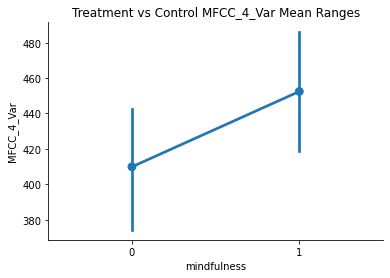


Feature: MFCC_12_Var
P-value: 0.102


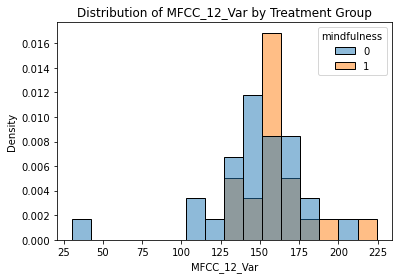

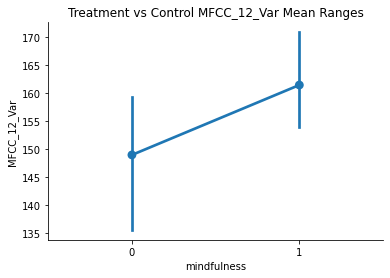


Feature: MFCC_5_Kurtosis
P-value: 0.1162


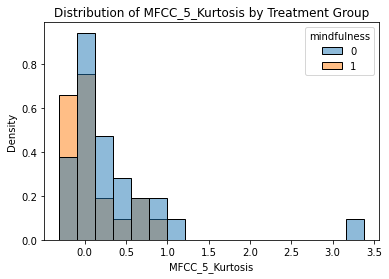

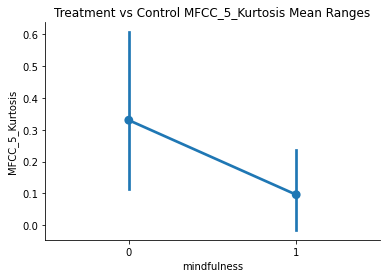


Feature: Teacher_Percent_Words
P-value: 0.1174


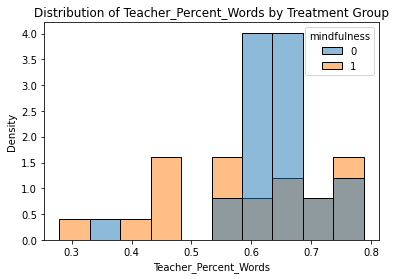

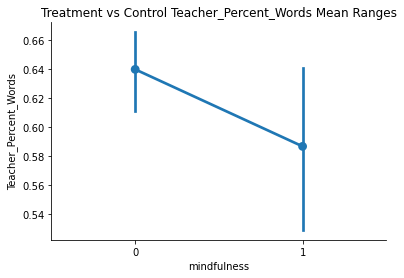


Feature: MFCC_2_Kurtosis
P-value: 0.1216


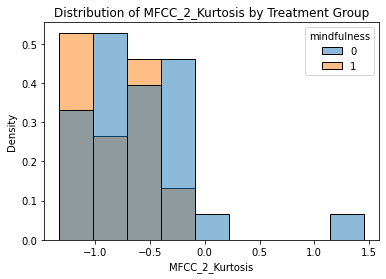

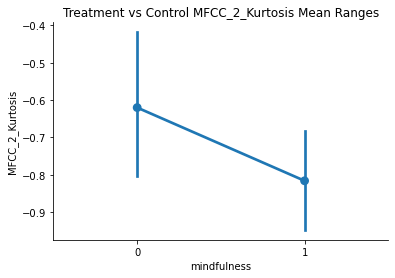


Feature: MFCC_13_Skew
P-value: 0.1222


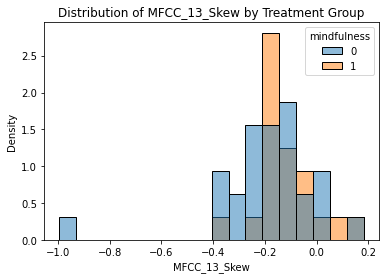

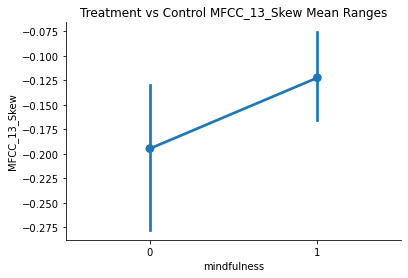


Feature: Student_Word_Rate
P-value: 0.1321


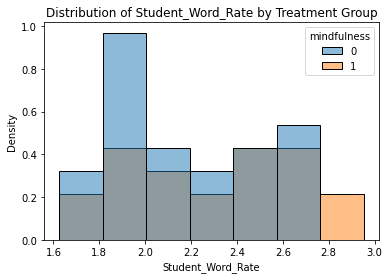

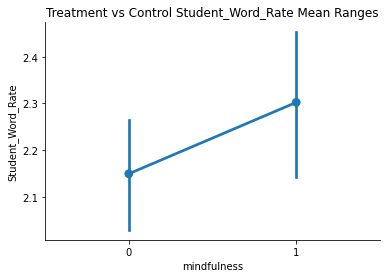


Feature: Flatness_Mean
P-value: 0.1607


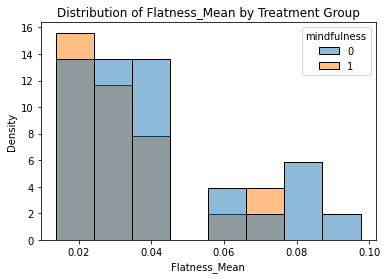

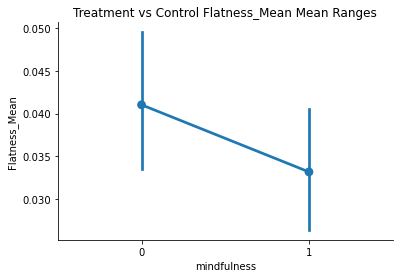

In [27]:
for feat in top_10_feats:
    print(f'Feature: {feat}')
    p_val = ttest_results_300s[ttest_results_300s['feature']==feat]['p_value'].iloc[0]
    print(f'P-value: {round(p_val,4)}')
    
    # Histogram comparing distrubtion of feature by group
    sns.histplot(data = df_300s, 
                 x = feat, 
                 hue = 'mindfulness',
                 stat = 'density')
    plt.title(f'Distribution of {feat} by Treatment Group')
    plt.show()
    
    # Plot comparing means and uncertainty
    sns.pointplot(x = 'mindfulness', y = feat, data = df_300s)
    sns.despine()
    plt.title(f'Treatment vs Control {feat} Mean Ranges')
    plt.show()
    print()

## 300s versus 200s

Although not the original research question, the impact of the COVID-19 pandemic on teachers participats in this study is another interesting questions. In the "300s Treatment versus Control" section above we looked only at 300s teachers because some particpants had more experience partipating in the virtual teaching simulation due to COVID. Thus, now instead of comparing treatment and control groups we're curious if there are actually more differences between the 200s versus 300s partipants. 


Compare 200s and 300s participants.

In [28]:
# Add column for 200s vs 300s
df['group'] = np.where(df['ID'] >= 300, '300s', '200s')

### Two Sample T-Test

Compute t-test comparing the differences in means between the treatment and control groups. Loop through each variable and save the t-stat and p-value in a data frame. 

Use [Scipy t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the T-test for the means of two independent samples. This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [29]:
# Create empty df to hold t-test results
ttest_results_200s_v_300s = pd.DataFrame()

In [30]:
for feat in feature_list:
    # Separate treatment and control into separate dataframes
    # and select just this feature
    df_0 = df[df['group']=='200s']
    df_1 = df[df['group']=='300s']
    
    # Compute t test results for this feature
    temp_result = stats.ttest_ind(a = df_0[feat], 
                                  b = df_1[feat],
                                  equal_var = False)
    
    # Add t stat and p value to results df
    df_temp = pd.DataFrame({
                            'feature': feat,
                            'mean_200s': df_0[feat].mean(),
                            'mean_300s': df_1[feat].mean(),
                            't_statistic': temp_result[0],
                            'p_value': temp_result[1]
                            }, 
                            index = [0])
    
    ttest_results_200s_v_300s = pd.concat([ttest_results_200s_v_300s, df_temp], axis=0)


In [31]:
ttest_results_200s_v_300s.reset_index(inplace = True, drop = True)

In [32]:
# Sort by p-value to see which variables show the largest differences
ttest_results_200s_v_300s.sort_values('p_value', inplace = True)
ttest_results_200s_v_300s.head(10)

,feature,mean_200s,mean_300s,t_statistic,p_value
57,MFCC_1_Skew,-0.791668,-3.780993,22.597757,4.251316e-32
96,Flatness_Max,0.130583,1.000001,-70.497756,1.944875e-26
88,Centroid_Max,6327.621410,9745.502530,-19.233987,6.463661e-26
98,Flatness_Std,0.009423,0.157169,-19.523977,5.120843e-25
93,Bandwidth_Min,386.681603,0.000000,32.493872,1.928544e-19
70,MFCC_1_Kurtosis,-0.531044,17.328542,-13.749903,2.176398e-18
105,Loudness_Min,-74.241579,-94.582264,24.799780,2.379477e-18
45,MFCC_2_Var,256.583703,408.478243,-13.658226,1.996342e-16
95,Flatness_Mean,0.003452,0.037655,-11.774509,4.841389e-16
44,MFCC_1_Var,17.573381,106.857975,-11.578343,1.266655e-15


Observations: 
- Interestingly, the p-values for the mean comparisons between the 200s versus 300s participants are much more significant than when comparing treatment and control participants. 
- All of the top 10 features (those with the smallest p-values) are features generated from the audio waves (e.g. MFCC, flatness, centroid, etc.) versus the more transcript-based features (e.g. average duration, word count, line count, etc). 
- See visuals below that are making me question these results.... possible bug in code to generate these features and/or difference in audio data (e.g. background noise).

### EDA for Top Features


In [33]:
top_10_feats = ttest_results_200s_v_300s.head(10).feature.to_list()

Feature: MFCC_1_Skew
P-value: 0.0


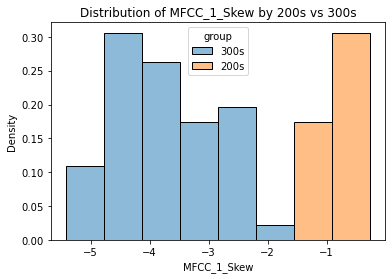

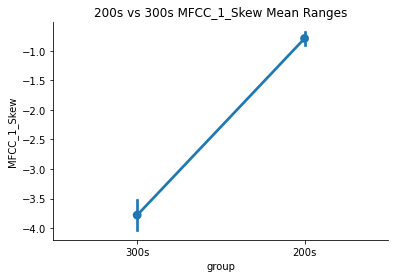


Feature: Flatness_Max
P-value: 0.0


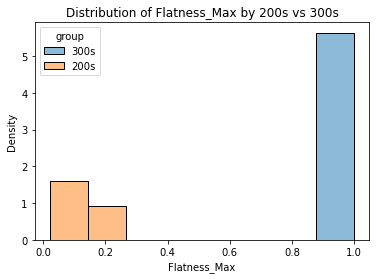

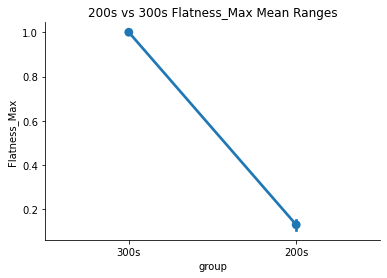


Feature: Centroid_Max
P-value: 0.0


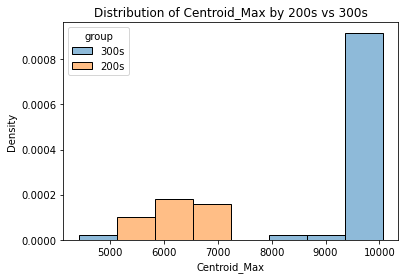

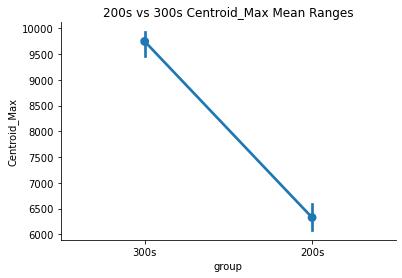


Feature: Flatness_Std
P-value: 0.0


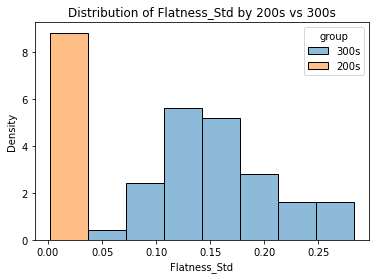

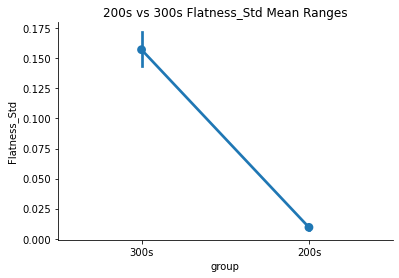


Feature: Bandwidth_Min
P-value: 0.0


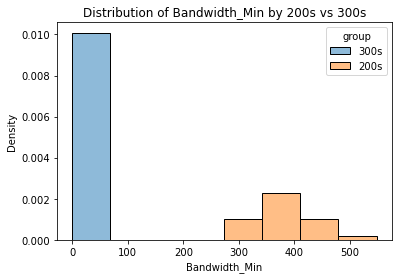

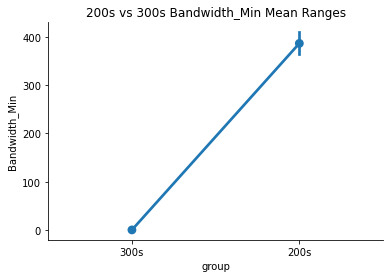


Feature: MFCC_1_Kurtosis
P-value: 0.0


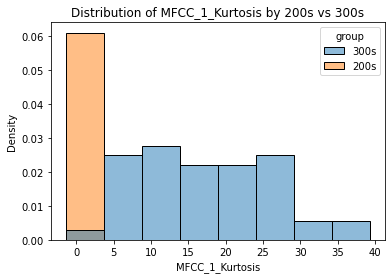

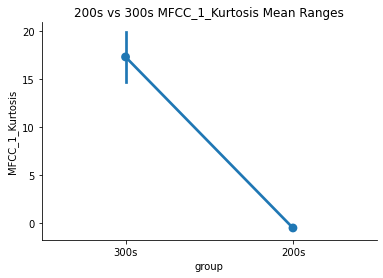


Feature: Loudness_Min
P-value: 0.0


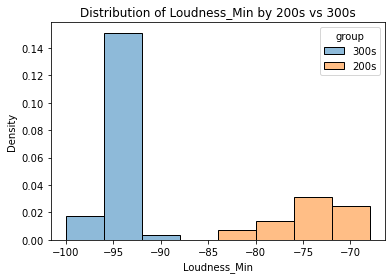

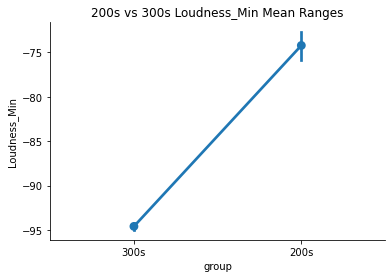


Feature: MFCC_2_Var
P-value: 0.0


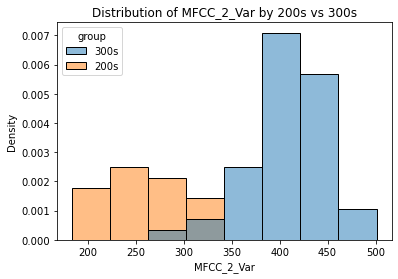

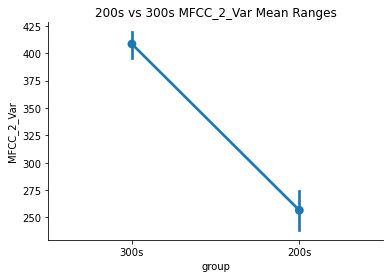


Feature: Flatness_Mean
P-value: 0.0


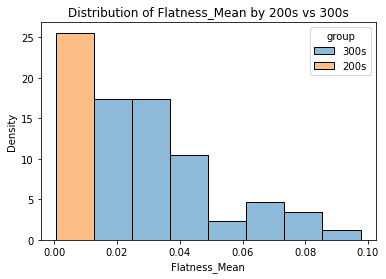

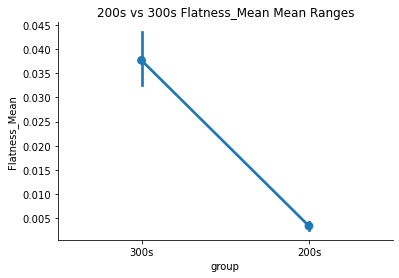


Feature: MFCC_1_Var
P-value: 0.0


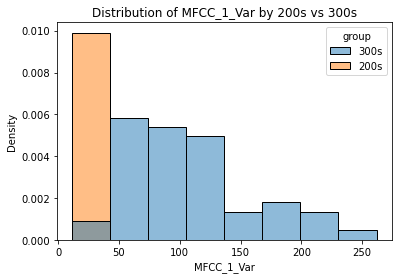

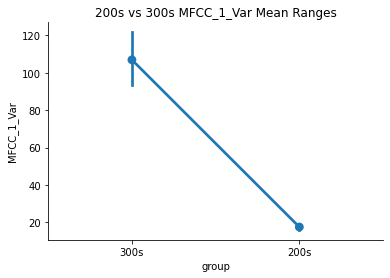

In [34]:
for feat in top_10_feats:
    print(f'Feature: {feat}')
    p_val = ttest_results_200s_v_300s[ttest_results_200s_v_300s['feature']==feat]['p_value'].iloc[0]
    print(f'P-value: {round(p_val,4)}')
    
    # Histogram comparing distrubtion of feature by group
    sns.histplot(data = df, 
                 x = feat, 
                 hue = 'group',
                 stat = 'density')
    plt.title(f'Distribution of {feat} by 200s vs 300s')
    plt.show()
    
    # Plot comparing means and uncertainty
    sns.pointplot(x = 'group', y = feat, data = df)
    sns.despine()
    plt.title(f'200s vs 300s {feat} Mean Ranges')
    plt.show()
    print()

Observations:
- Looking at some of these plots I wonder about the accuracy of this data. Are these actual differences between participants? Or were there changes in the data collection methods between the two years of the experiment? What could be causing almost zero variation for some of these features within a group of participants? If these results are showing such clear differences between teh 200s and 300s can we even trust the results comparing treatment and control groups?